# **Spit some [tensor] flow**

We need to learn the intricacies of tensorflow to master deep learning



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
print(tf.__version__)

2.2.0


In [0]:
from tensorflow.keras.layers import Input, Conv2D, Dropout, Dense, Flatten, MaxPool2D, UpSampling2D, Reshape
from tensorflow.keras.models import Model

In [3]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
X_train, X_test = X_train / 255.0 , X_test / 255.0 
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print(X_train.shape)
print(X_test.shape)
# SHAPE 
# N x H x W x Colors 
# Colors = 1 for grayscale 
# Fashion MNIST is grayscale

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [6]:
classes = len(set(y_train))
print(classes)

10


In [7]:
 X_train[0].shape

(28, 28, 1)

In [0]:
input_shape = X_train[0].shape

In [0]:
i_layer = Input(shape = input_shape)
h_layer = Conv2D(16, (3,3), activation='relu', padding='same')(i_layer)
h_layer = MaxPool2D((2,2), padding = 'same')(h_layer)
h_layer = Conv2D(8, (3,3), activation='relu', padding='same')(h_layer)
h_layer = MaxPool2D((2,2), padding = 'same')(h_layer)
h_layer = UpSampling2D((2,2))(h_layer)
h_layer = Conv2D(8, (3,3), activation='relu', padding='same')(h_layer)
h_layer = UpSampling2D((2,2))(h_layer)
h_layer = Conv2D(16, (3,3), activation='relu', padding='same')(h_layer)
o_layer = Conv2D(1, (3,3), activation=None, padding='same')(h_layer)
model = Model(i_layer, o_layer)


In [38]:
model.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
up_sampling2d_12 (UpSampling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 14, 14, 8)         584

In [40]:
model.compile(optimizer='adam', 
              loss = "mse")

report = model.fit(X_train, X_train, epochs=10, batch_size=200)

Epoch 1/10
300/300 [==============================] - 89s 297ms/step - loss: 0.0076
Epoch 2/10
300/300 [==============================] - 89s 298ms/step - loss: 0.0062
Epoch 3/10
300/300 [==============================] - 89s 298ms/step - loss: 0.0053
Epoch 4/10
300/300 [==============================] - 89s 297ms/step - loss: 0.0048
Epoch 5/10
300/300 [==============================] - 90s 299ms/step - loss: 0.0045
Epoch 6/10
300/300 [==============================] - 90s 301ms/step - loss: 0.0043
Epoch 7/10
300/300 [==============================] - 90s 301ms/step - loss: 0.0041
Epoch 8/10
300/300 [==============================] - 91s 304ms/step - loss: 0.0040
Epoch 9/10
300/300 [==============================] - 90s 301ms/step - loss: 0.0038
Epoch 10/10
300/300 [==============================] - 90s 300ms/step - loss: 0.0037


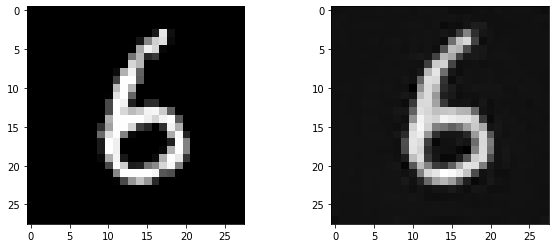

In [43]:
idx = np.random.randint(0, len(X_train))
fig,ax = plt.subplots(1,2,figsize=(10,4))
ax[0].imshow(X_train[idx].reshape(28,28), cmap='gray')
X_decoded = model.predict(X_train[[idx]])
ax[1].imshow(X_decoded.reshape(28,28), cmap='gray')